# Week 19 - Progress Log

## 🔬 Analytical Tasks

Calculate the **degree (in-degree and out-degree)** of each node for all food web graphs.

### Precision-Recall Curve

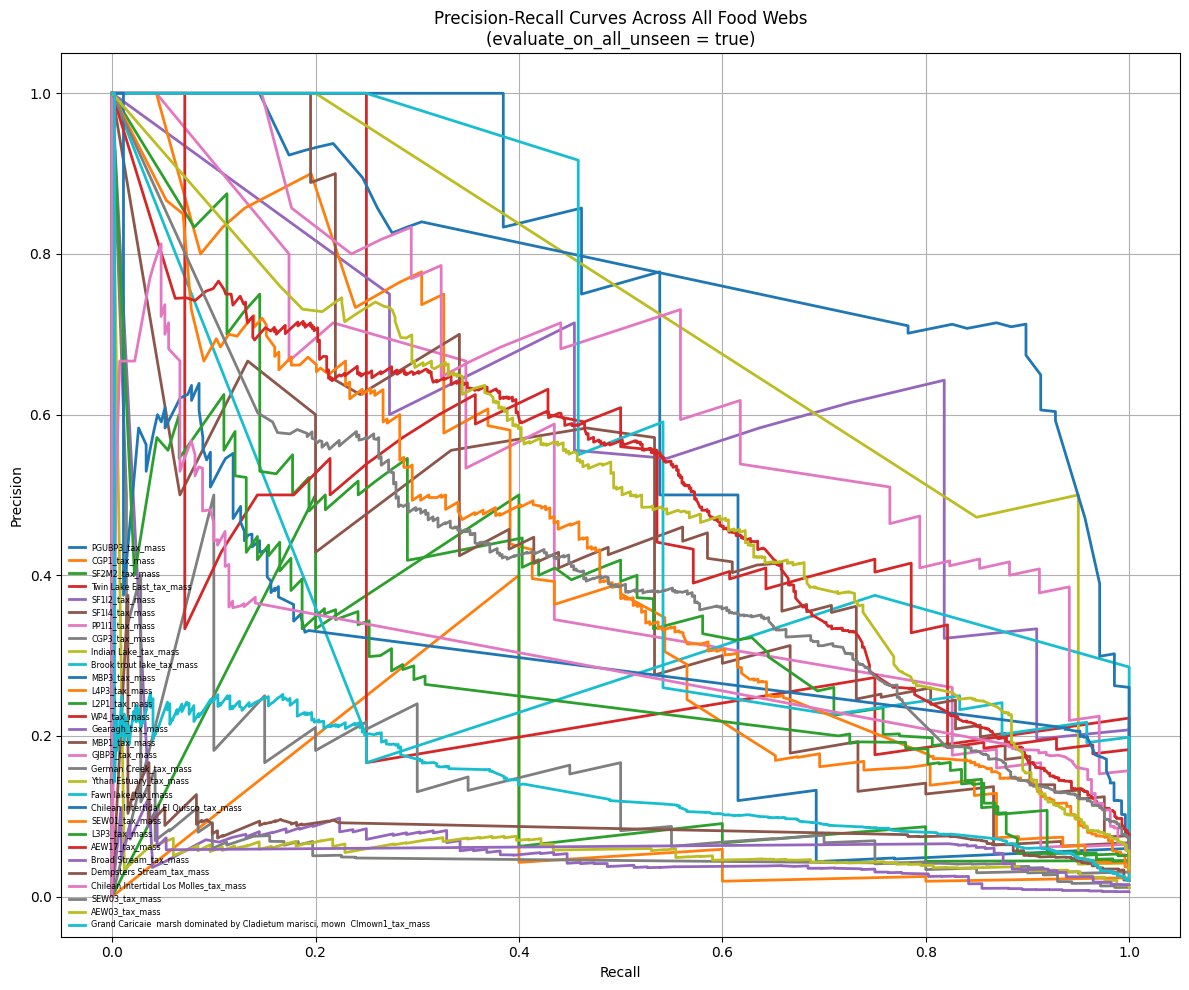

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import os

# === Load list of food webs ===
foodwebs_df = pd.read_csv("../../src/matlab/data/foodwebs_mat/foodweb_metrics_small.csv")

# === Base path where score-label CSVs are stored ===
base_path = "../../src/matlab/data/result_evaluate_on_all_unseen-true/confusion_matrix_csv"

# === Initialize plot ===
plt.figure(figsize=(12, 10))

# === Loop through each food web ===
for foodweb in foodwebs_df["Foodweb"]:
    file_path = os.path.join(base_path, f"{foodweb}_K_10_scores_labels_evaluate_on_all_unseen-true.csv")

    try:
        df = pd.read_csv(file_path)
        precision, recall, _ = precision_recall_curve(df['Label'], df['Score'])

        # Plot each curve on the same figure
        plt.plot(recall, precision, lw=2, label=foodweb)

    except Exception as e:
        print(f"Skipping {foodweb}: {e}")

# === Finalize plot ===
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves Across All Food Webs\n(evaluate_on_all_unseen = true)")
plt.grid(True)
plt.legend(loc='lower left', fontsize='xx-small', frameon=False)
plt.tight_layout()
plt.show()

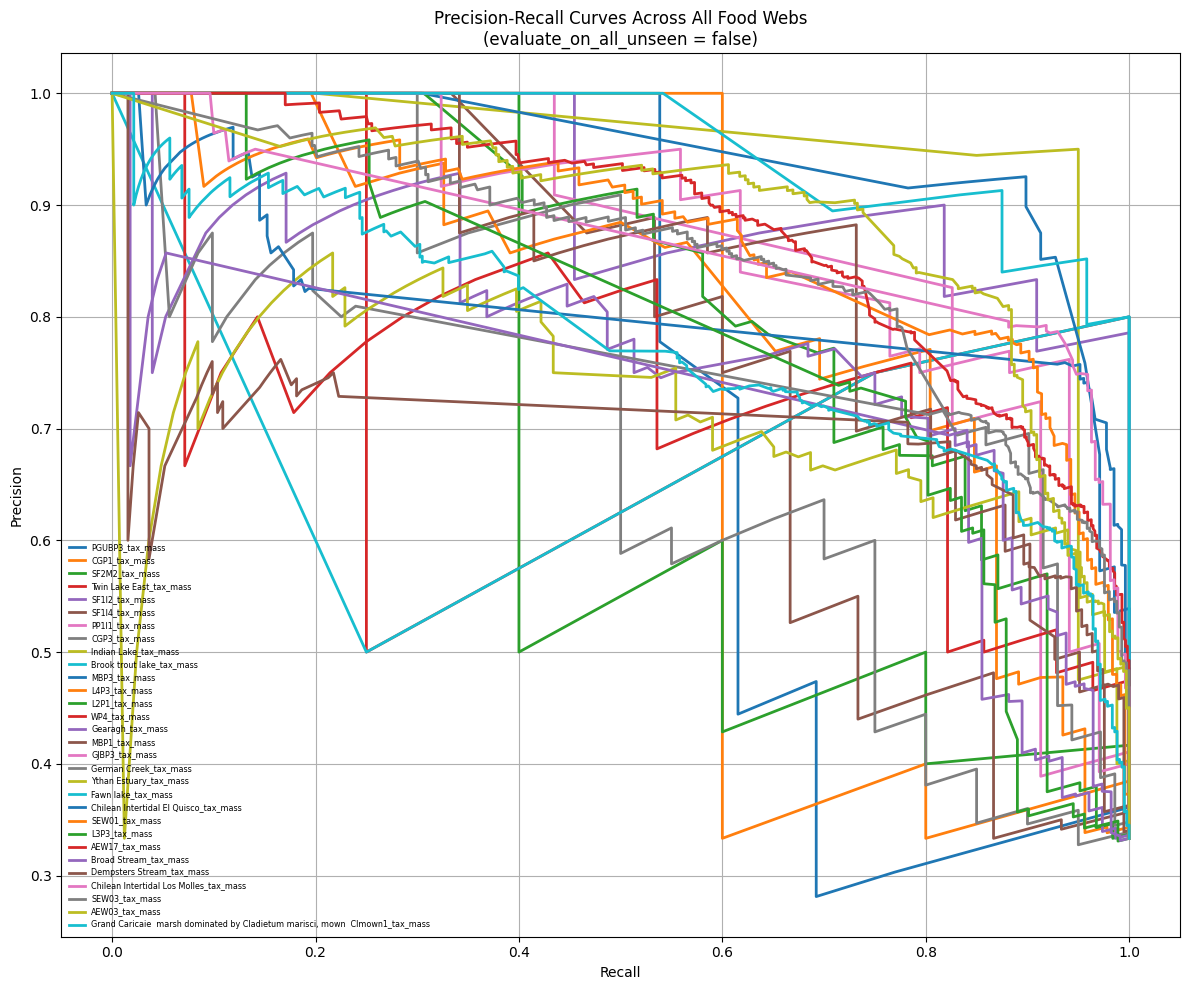

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import os

# === Load list of food webs ===
foodwebs_df = pd.read_csv("../../src/matlab/data/foodwebs_mat/foodweb_metrics_small.csv")

# === Base path where score-label CSVs are stored ===
base_path = "../../src/matlab/data/result_evaluate_on_all_unseen-false/confusion_matrix_csv"

# === Initialize plot ===
plt.figure(figsize=(12, 10))

# === Loop through each food web ===
for foodweb in foodwebs_df["Foodweb"]:
    file_path = os.path.join(base_path, f"{foodweb}_K_10_scores_labels_evaluate_on_all_unseen-false.csv")

    try:
        df = pd.read_csv(file_path)
        precision, recall, _ = precision_recall_curve(df['Label'], df['Score'])

        # Plot each curve on the same figure
        plt.plot(recall, precision, lw=2, label=foodweb)

    except Exception as e:
        print(f"Skipping {foodweb}: {e}")

# === Finalize plot ===
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves Across All Food Webs\n(evaluate_on_all_unseen = false)")
plt.grid(True)
plt.legend(loc='lower left', fontsize='xx-small', frameon=False)
plt.tight_layout()
plt.show()

---

#### 📊 Precision-Recall Curves: `evaluate_on_all_unseen = true` vs `false`

| Aspect                         | `evaluate_on_all_unseen = true`                                                   | `evaluate_on_all_unseen = false`                                                |
| ------------------------------ | --------------------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| **Evaluation Scope**           | All possible predator–prey pairs (including unseen/unlikely interactions)         | Only observed/tested pairs (i.e., known plausible candidates)                   |
| **Curve Shape**                | Sparse, jagged, and drops in precision are abrupt                                 | Smooth, consistently high precision across most recall values                   |
| **Precision Distribution**     | Widely spread — many food webs drop to low precision quickly                      | Most food webs maintain precision > 0.7 across wide recall ranges               |
| **Recall-Precision Trade-off** | Steep drops: as recall increases, precision often crashes                         | Graceful decline: model maintains precision even at high recall                 |
| **Signal-to-Noise Ratio**      | Low — dominated by negatives, many false positives dilute learning                | High — cleaner evaluation on biologically plausible edges                       |
| **Interpretation**             | Tests model’s ability to **generalize** to unseen links (exploratory performance) | Tests model’s ability to **rank known candidates** (discriminative performance) |
| **Use Case**                   | Robustness/generalization across full graph                                       | In-network prediction, e.g. within an ecological dataset                        |

#### 🧠 Interpretation Summary

* **`evaluate_on_all_unseen = true`** simulates **real-world link prediction** challenges:

  * Useful when exploring new/unobserved predator-prey links.
  * The **drop in precision** reflects the model's struggle to distinguish rare positives from the overwhelming majority of negatives.

* **`evaluate_on_all_unseen = false`** reflects a **supervised ranking task**:

  * This setting evaluates how well the model ranks **known, biologically plausible links**.
  * Precision remains high even with increasing recall — strong signal learning.

#### ✅ Notebook Takeaway

> The comparison of PR curves under both evaluation modes shows a clear distinction between **generalization** and **discrimination** capacity. While the model performs well in identifying and ranking plausible links (`evaluate_on_all_unseen = false`), its precision drops sharply when tested against all potential link combinations in the network (`evaluate_on_all_unseen = true`). This highlights the importance of **evaluation context** in interpreting model performance.

---

### (Receiver Operating Characteristic) ROC Curve

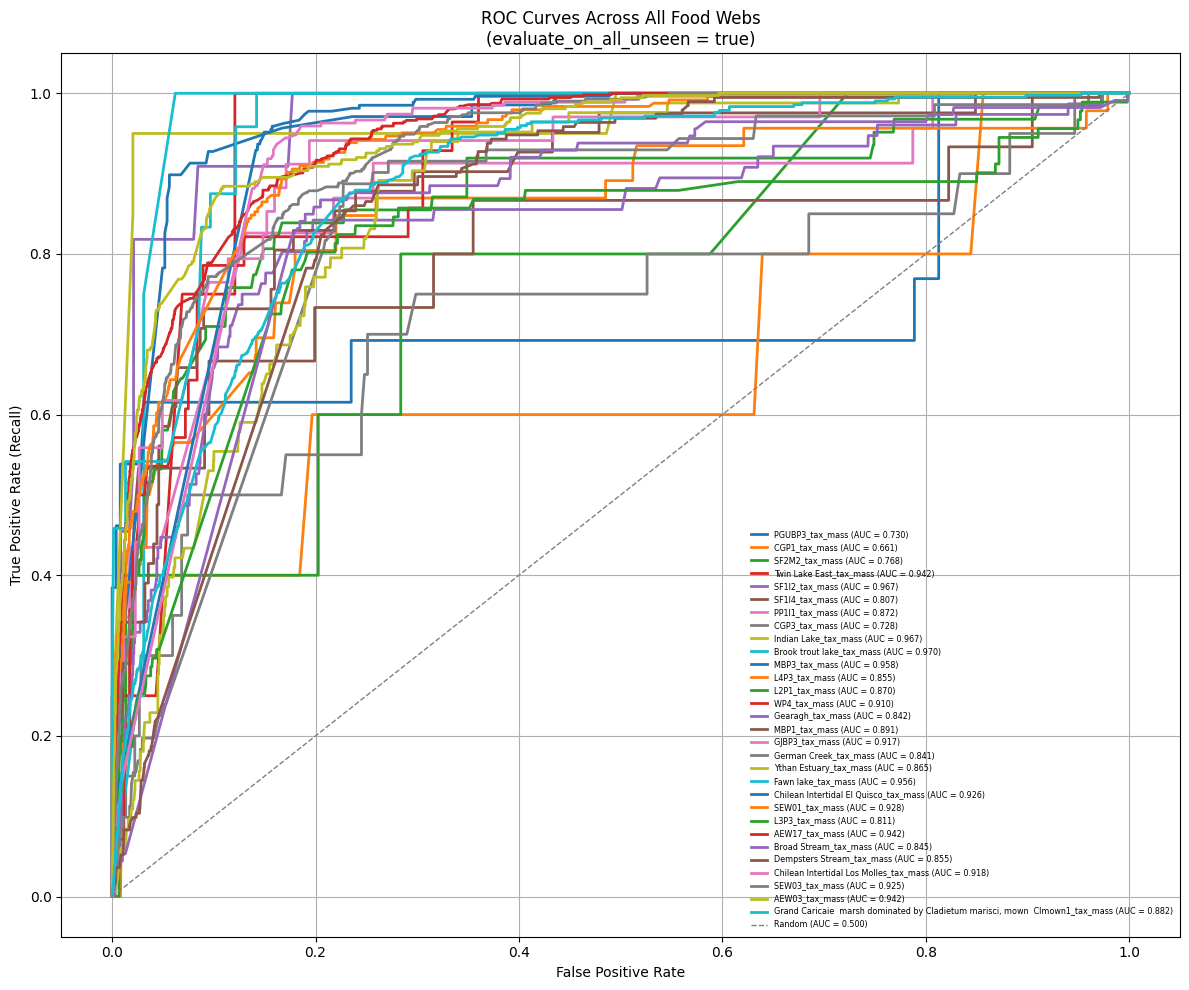

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os

# === Load list of food webs ===
foodwebs_df = pd.read_csv("../../src/matlab/data/foodwebs_mat/foodweb_metrics_small.csv")

# === Base path to your score-label CSVs ===
base_path = "../../src/matlab/data/result_evaluate_on_all_unseen-true/confusion_matrix_csv"

# === Start the combined plot ===
plt.figure(figsize=(12, 10))

# === Loop over each food web and plot its ROC curve ===
for foodweb in foodwebs_df["Foodweb"]:
    file_path = os.path.join(base_path, f"{foodweb}_K_10_scores_labels_evaluate_on_all_unseen-true.csv")

    try:
        df = pd.read_csv(file_path)
        y_true = df['Label']
        y_score = df['Score']

        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f"{foodweb} (AUC = {roc_auc:.3f})")

    except Exception as e:
        print(f"Skipping {foodweb} due to error: {e}")

# === Finalize the plot ===
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title("ROC Curves Across All Food Webs\n(evaluate_on_all_unseen = true)")
plt.legend(loc='lower right', fontsize='xx-small', frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()

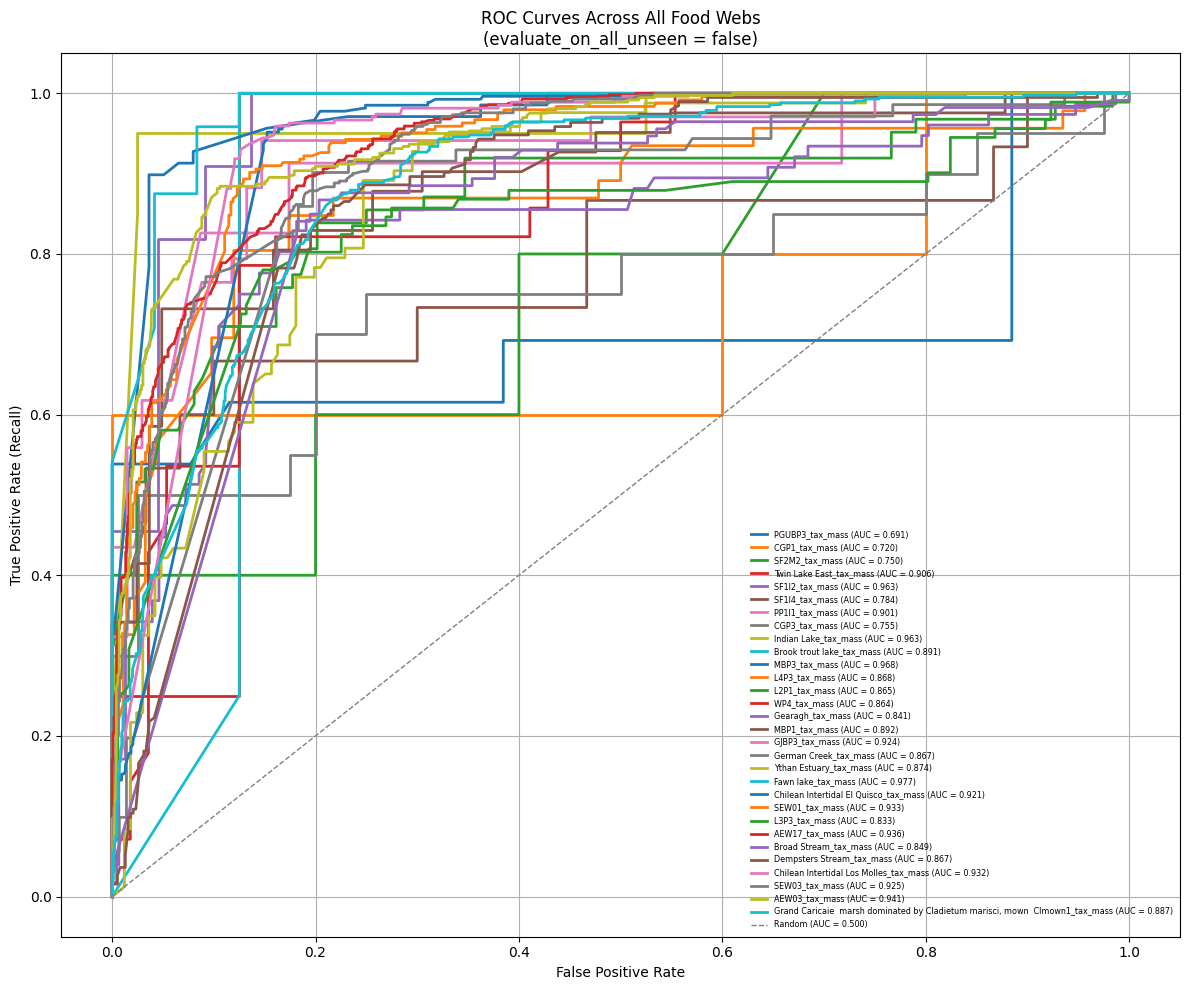

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os

# === Load list of food webs ===
foodwebs_df = pd.read_csv("../../src/matlab/data/foodwebs_mat/foodweb_metrics_small.csv")

# === Base path to your score-label CSVs ===
base_path = "../../src/matlab/data/result_evaluate_on_all_unseen-false/confusion_matrix_csv"

# === Start the combined plot ===
plt.figure(figsize=(12, 10))

# === Loop over each food web and plot its ROC curve ===
for foodweb in foodwebs_df["Foodweb"]:
    file_path = os.path.join(base_path, f"{foodweb}_K_10_scores_labels_evaluate_on_all_unseen-false.csv")

    try:
        df = pd.read_csv(file_path)
        y_true = df['Label']
        y_score = df['Score']

        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f"{foodweb} (AUC = {roc_auc:.3f})")

    except Exception as e:
        print(f"Skipping {foodweb} due to error: {e}")

# === Finalize the plot ===
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title("ROC Curves Across All Food Webs\n(evaluate_on_all_unseen = false)")
plt.legend(loc='lower right', fontsize='xx-small', frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()

---

#### 📊 ROC Curve Comparison: `evaluate_on_all_unseen = true` vs `false`

| Aspect               | `evaluate_on_all_unseen = true`                                                           | `evaluate_on_all_unseen = false`                                                                 |
| -------------------- | ----------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------ |
| **Evaluation Scope** | All possible predator–prey combinations                                                   | Only observed/tested candidate links                                                             |
| **AUC Distribution** | Generally high (many > 0.85), but with a few around \~0.70                                | Also high, but consistently slightly **higher** per food web                                     |
| **Curve Behavior**   | Some curves rise slower (less convex), indicating **false positives** from negative space | Most curves hug the top-left, suggesting **strong separability** between positives and negatives |
| **Model Robustness** | Shows good ability to generalize link probabilities across the full graph                 | Shows strong **ranking accuracy** within known interaction candidates                            |
| **Gap in AUC**       | Noticeable gap in AUC for low-performing food webs (e.g., `PGUBP3`)                       | Those same food webs improve AUC under filtered evaluation                                       |

#### 🧠 Interpretation Summary

* ROC AUC is inherently **less sensitive to class imbalance** than PR curves — which explains why both modes yield consistently high AUCs.
* The **difference in AUC is smaller** than in PR curves, but still meaningful: `evaluate_on_all_unseen = false` consistently shows **sharper true positive recovery** at low false positive rates.
* AUC drops in `evaluate_on_all_unseen = true` reflect difficulty distinguishing **rare true links** from a **sea of negative pairs**, especially for sparse or low-connectivity food webs.

#### ✅ Notebook Takeaway

> Comparing ROC curves across both evaluation modes confirms that the model performs reliably in **ranking predictions**, but generalizing to the full link space (in `evaluate_on_all_unseen = true`) remains more challenging. While AUCs are generally high in both modes, the **top-left convexity is stronger** in `false`, indicating higher confidence and earlier retrieval of true links. This reinforces the importance of evaluation context — ROC AUC under `false` offers a clearer picture of ranking accuracy within ecologically plausible interaction sets.

---

## ⚙️ Code Adjustments

* [ ] Adjust the `sample_neg()` logic to:
  * Preserve **directionality**.
  * Improve **realistic negative sampling** by:
    * Using predefined classes: `predator`, `prey`, and `predator-prey`.
    * Only generating **negative links between predator–predator and prey–prey species**, as these represent rare or biologically implausible.

### ✅ **Classify Each Species Into One of 3 Roles**

From the **adjacency matrix `net`**:

| Role                  | Definition                                      | Detection                                      |
| --------------------- | ----------------------------------------------- | ---------------------------------------------- |
| **Resource**          | Only has **outgoing edges** (i.e., gets eaten)  | `sum(net(i, :)) > 0` and `sum(net(:, i)) == 0` |
| **Consumer**          | Only has **incoming edges** (i.e., eats others) | `sum(net(:, i)) > 0` and `sum(net(i, :)) == 0` |
| **Consumer-Resource** | Has both incoming and outgoing edges            | `sum(net(i, :)) > 0` and `sum(net(:, i)) > 0`  |

In [3]:
import pandas as pd
import scipy.io
import scipy.sparse as sp
import numpy as np
import os

# Load list of foodwebs
foodwebs_df = pd.read_csv("../../src/matlab/data/foodwebs_mat/foodweb_metrics_small.csv")
mat_dir = "../../src/matlab/data/foodwebs_mat"
output_info = []

for foodweb in foodwebs_df["Foodweb"]:
    filename = f"{foodweb}.mat"
    filepath = os.path.join(mat_dir, filename)

    if not os.path.exists(filepath):
        output_info.append((foodweb, "File not found"))
        continue

    try:
        mat_data = scipy.io.loadmat(filepath)
        net = mat_data.get("net")

        if net is None:
            output_info.append((foodweb, "Missing 'net' variable"))
            continue

        # Convert sparse or cell-based to dense
        if sp.issparse(net):
            net = net.toarray()
        elif isinstance(net, np.ndarray) and net.ndim == 2:
            net = np.array(net)
        else:
            output_info.append((foodweb, "Unsupported format for 'net'"))
            continue

        N = net.shape[0]
        roles = np.full((N, 1), "unlinked", dtype=object)

        for i in range(N):
            is_predator = np.any(net[:, i])  # has incoming links
            is_prey = np.any(net[i, :])      # has outgoing links
            if is_predator and is_prey:
                roles[i] = "consumer-resource"
            elif is_predator:
                roles[i] = "consumer"
            elif is_prey:
                roles[i] = "resource"

        # Save role classification
        scipy.io.savemat(filepath, {**mat_data, "role": roles})
        output_info.append((foodweb, "Role classification added"))

    except Exception as e:
        output_info.append((foodweb, f"Error: {str(e)}"))

# Summary of results
output_df = pd.DataFrame(output_info, columns=["Foodweb", "Status"])
output_df

,Foodweb,Status
0,PGUBP3_tax_mass,Role classification added
1,CGP1_tax_mass,Role classification added
2,SF2M2_tax_mass,Role classification added
3,Twin Lake East_tax_mass,Role classification added
4,SF1I2_tax_mass,Role classification added
5,SF1I4_tax_mass,Role classification added
6,PP1I1_tax_mass,Role classification added
7,CGP3_tax_mass,Role classification added
8,Indian Lake_tax_mass,Role classification added
9,Brook trout lake_tax_mass,Role classification added


### Precision-Recall Curve  (After: Trophic Role-Based Negative Sampling)

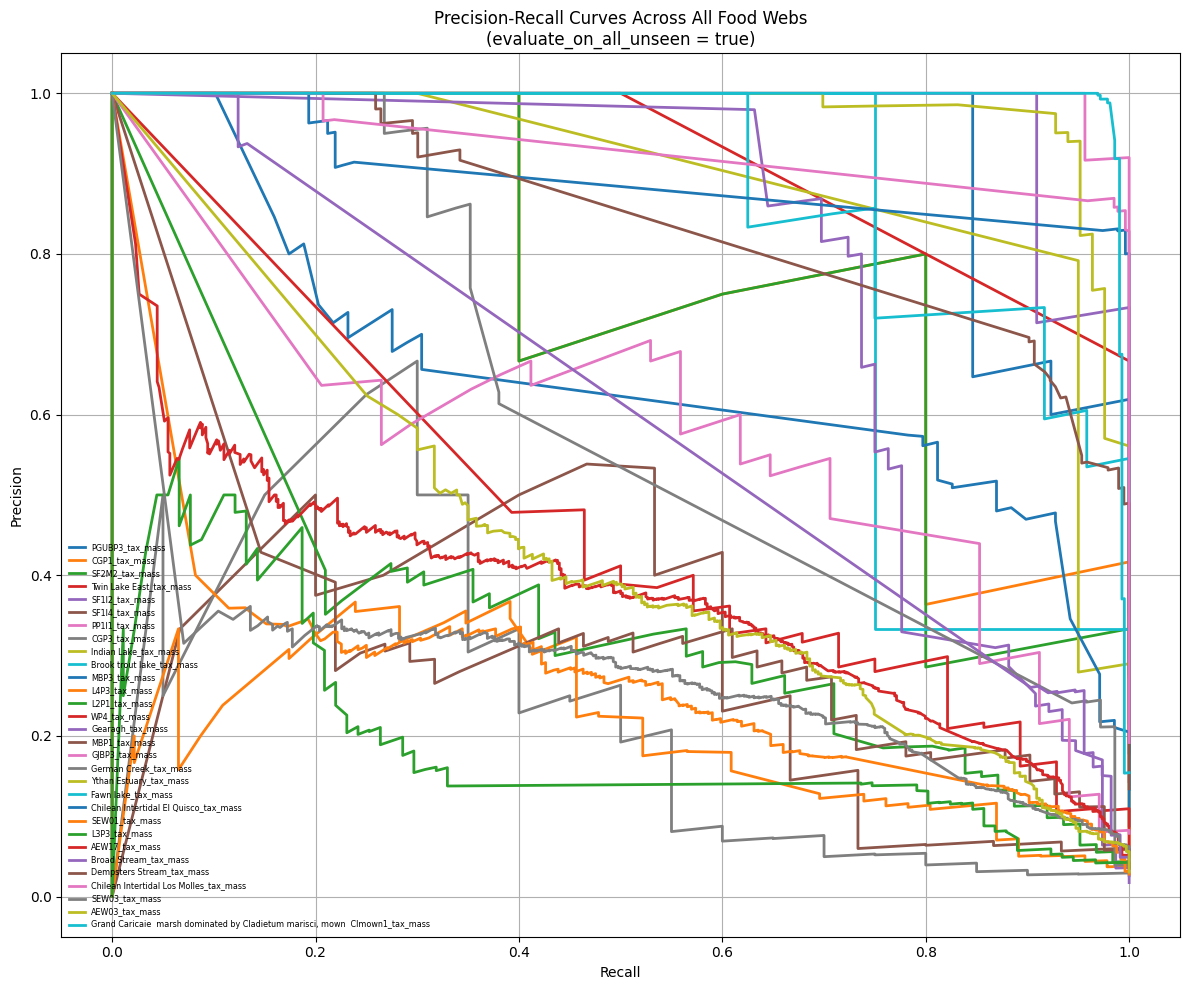

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import os

# === Load list of food webs ===
foodwebs_df = pd.read_csv("../../src/matlab/data/foodwebs_mat/foodweb_metrics_small.csv")

# === Base path where score-label CSVs are stored ===
base_path = "../../src/matlab/data/result_evaluate_on_all_unseen-true/confusion_matrix_csv"

# === Initialize plot ===
plt.figure(figsize=(12, 10))

# === Loop through each food web ===
for foodweb in foodwebs_df["Foodweb"]:
    file_path = os.path.join(base_path, f"{foodweb}_K_10_scores_labels_evaluate_on_all_unseen-true.csv")

    try:
        df = pd.read_csv(file_path)
        precision, recall, _ = precision_recall_curve(df['Label'], df['Score'])

        # Plot each curve on the same figure
        plt.plot(recall, precision, lw=2, label=foodweb)

    except Exception as e:
        print(f"Skipping {foodweb}: {e}")

# === Finalize plot ===
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves Across All Food Webs\n(evaluate_on_all_unseen = true)")
plt.grid(True)
plt.legend(loc='lower left', fontsize='xx-small', frameon=False)
plt.tight_layout()
plt.show()

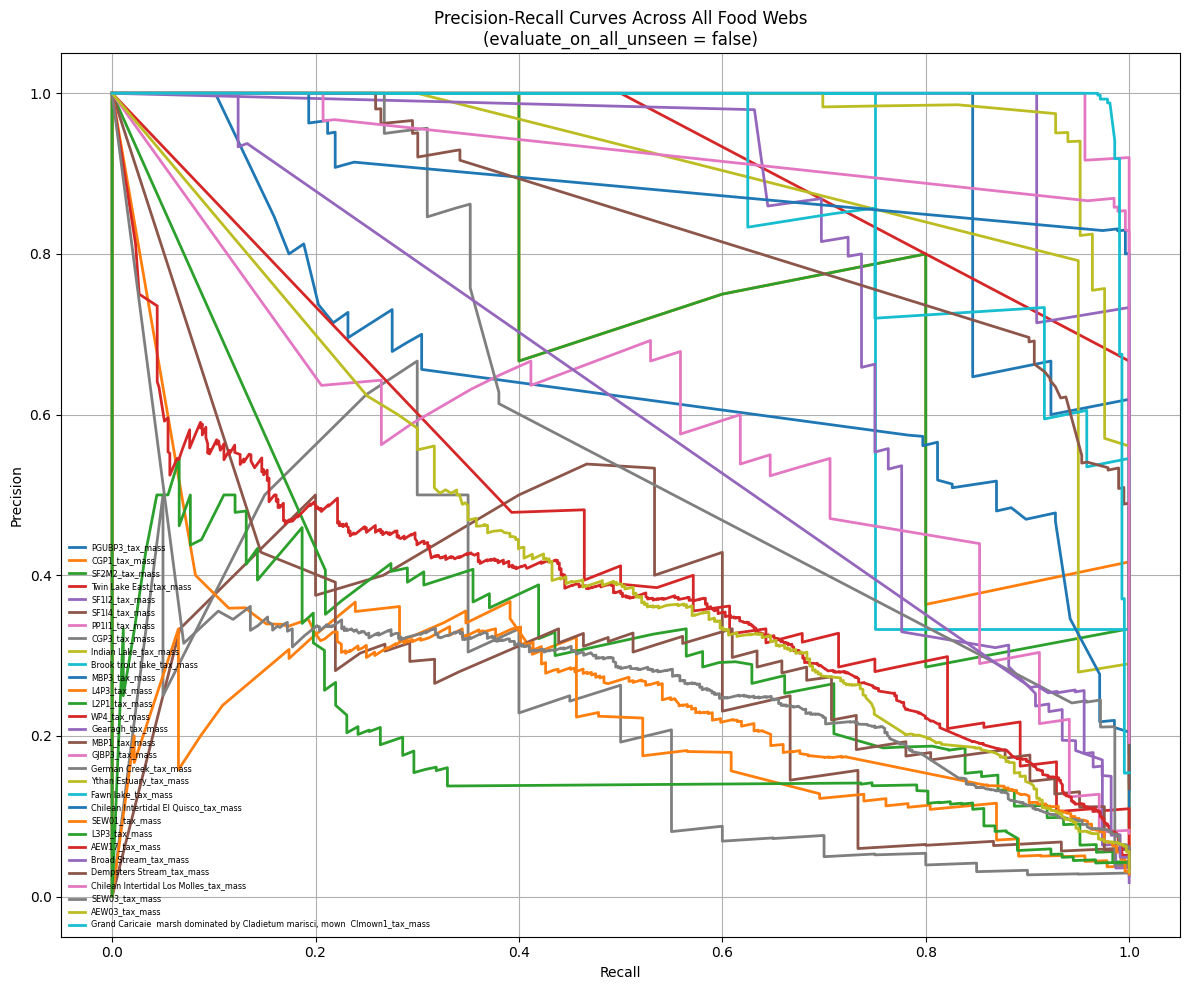

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import os

# === Load list of food webs ===
foodwebs_df = pd.read_csv("../../src/matlab/data/foodwebs_mat/foodweb_metrics_small.csv")

# === Base path where score-label CSVs are stored ===
base_path = "../../src/matlab/data/result_evaluate_on_all_unseen-false/confusion_matrix_csv"

# === Initialize plot ===
plt.figure(figsize=(12, 10))

# === Loop through each food web ===
for foodweb in foodwebs_df["Foodweb"]:
    file_path = os.path.join(base_path, f"{foodweb}_K_10_scores_labels_evaluate_on_all_unseen-false.csv")

    try:
        df = pd.read_csv(file_path)
        precision, recall, _ = precision_recall_curve(df['Label'], df['Score'])

        # Plot each curve on the same figure
        plt.plot(recall, precision, lw=2, label=foodweb)

    except Exception as e:
        print(f"Skipping {foodweb}: {e}")

# === Finalize plot ===
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves Across All Food Webs\n(evaluate_on_all_unseen = false)")
plt.grid(True)
plt.legend(loc='lower left', fontsize='xx-small', frameon=False)
plt.tight_layout()
plt.show()

---

#### 📊 PR Curve Comparison: Before vs After Role-Constrained Negative Sampling

| Aspect                     | **Before (Random Negatives)**                                               | **After (Trophic Role-Based)**                                              |
| -------------------------- | --------------------------------------------------------------------------- | --------------------------------------------------------------------------- |
| **Evaluation Type**        | `evaluate_on_all_unseen` (True / False)                                     | Same (True / False)                                                         |
| **Curve Shape**            | Many jagged, dropping curves                                                | Smoother, more stable patterns                                              |
| **Precision @ Low Recall** | Highly variable, many models drop to 0 quickly                              | More food webs sustain moderate-to-high precision early on                  |
| **Noise in Negatives**     | Contains biologically plausible false negatives (e.g., resource → consumer) | Eliminated — only implausible (consumer–consumer or resource–resource) used |
| **Precision Distribution** | Widespread, lots of noise                                                   | Tighter distribution, better signal recovery                                |
| **Biological Validity**    | Less realistic                                                              | Highly interpretable and ecologically grounded                              |
| **Impact on Classifier**   | Forced to learn from noisy labels                                           | Focuses on truly "impossible" interactions as negatives                     |

#### 🧠 Interpretation Summary

> After applying **trophic role-based negative sampling**, PR curves across food webs became **more consistent and interpretable**, especially under the `evaluate_on_all_unseen = true` setting. This reflects a more biologically faithful evaluation — the model is no longer penalized for failing to predict links that are **plausible but unobserved**. Instead, it is evaluated against links that are ecologically unlikely, improving both the precision signal and interpretability of results.

---

### (Receiver Operating Characteristic) ROC Curve  (After: Trophic Role-Based Negative Sampling)

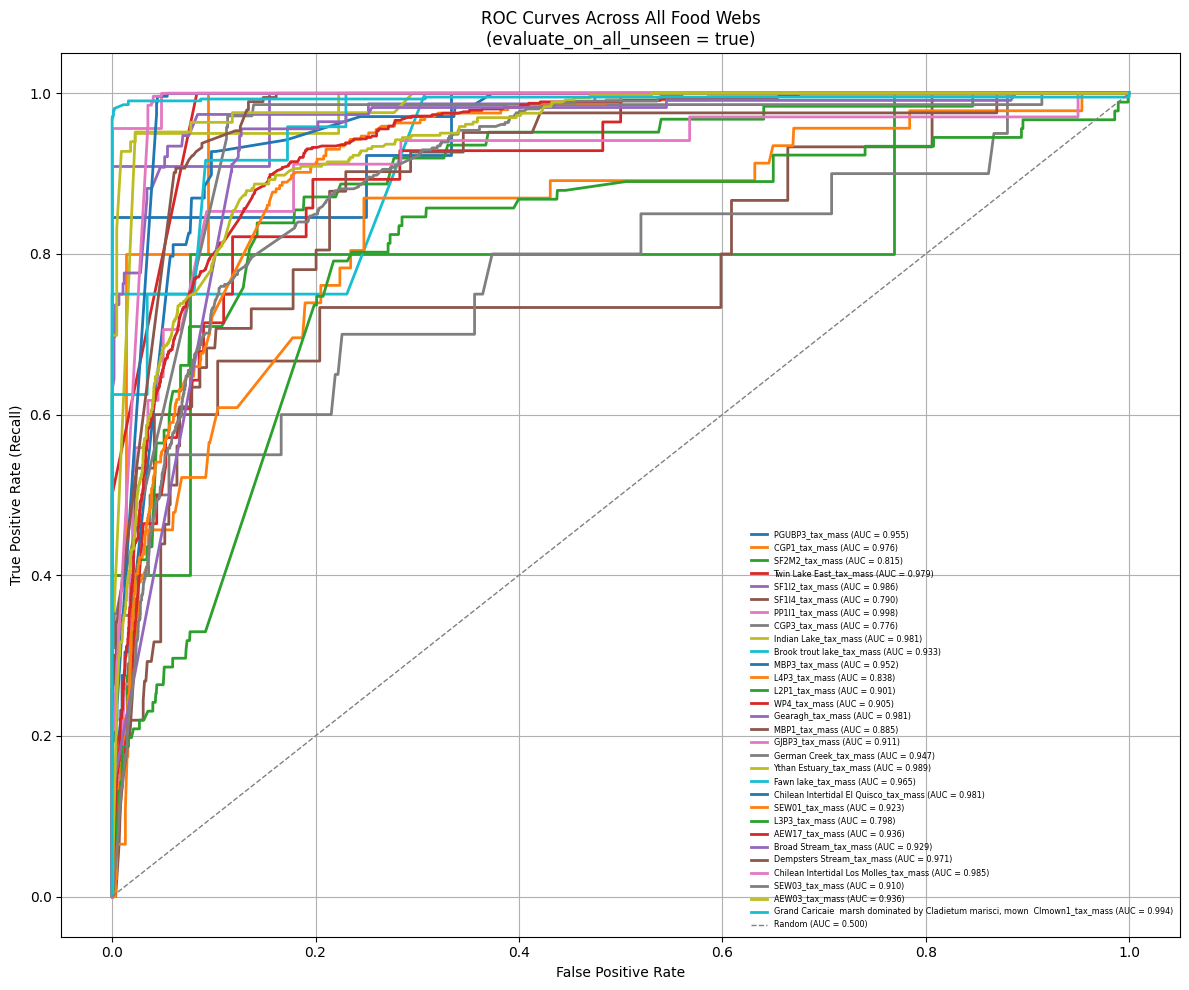

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os

# === Load list of food webs ===
foodwebs_df = pd.read_csv("../../src/matlab/data/foodwebs_mat/foodweb_metrics_small.csv")

# === Base path to your score-label CSVs ===
base_path = "../../src/matlab/data/result_evaluate_on_all_unseen-true/confusion_matrix_csv"

# === Start the combined plot ===
plt.figure(figsize=(12, 10))

# === Loop over each food web and plot its ROC curve ===
for foodweb in foodwebs_df["Foodweb"]:
    file_path = os.path.join(base_path, f"{foodweb}_K_10_scores_labels_evaluate_on_all_unseen-true.csv")

    try:
        df = pd.read_csv(file_path)
        y_true = df['Label']
        y_score = df['Score']

        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f"{foodweb} (AUC = {roc_auc:.3f})")

    except Exception as e:
        print(f"Skipping {foodweb} due to error: {e}")

# === Finalize the plot ===
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title("ROC Curves Across All Food Webs\n(evaluate_on_all_unseen = true)")
plt.legend(loc='lower right', fontsize='xx-small', frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()

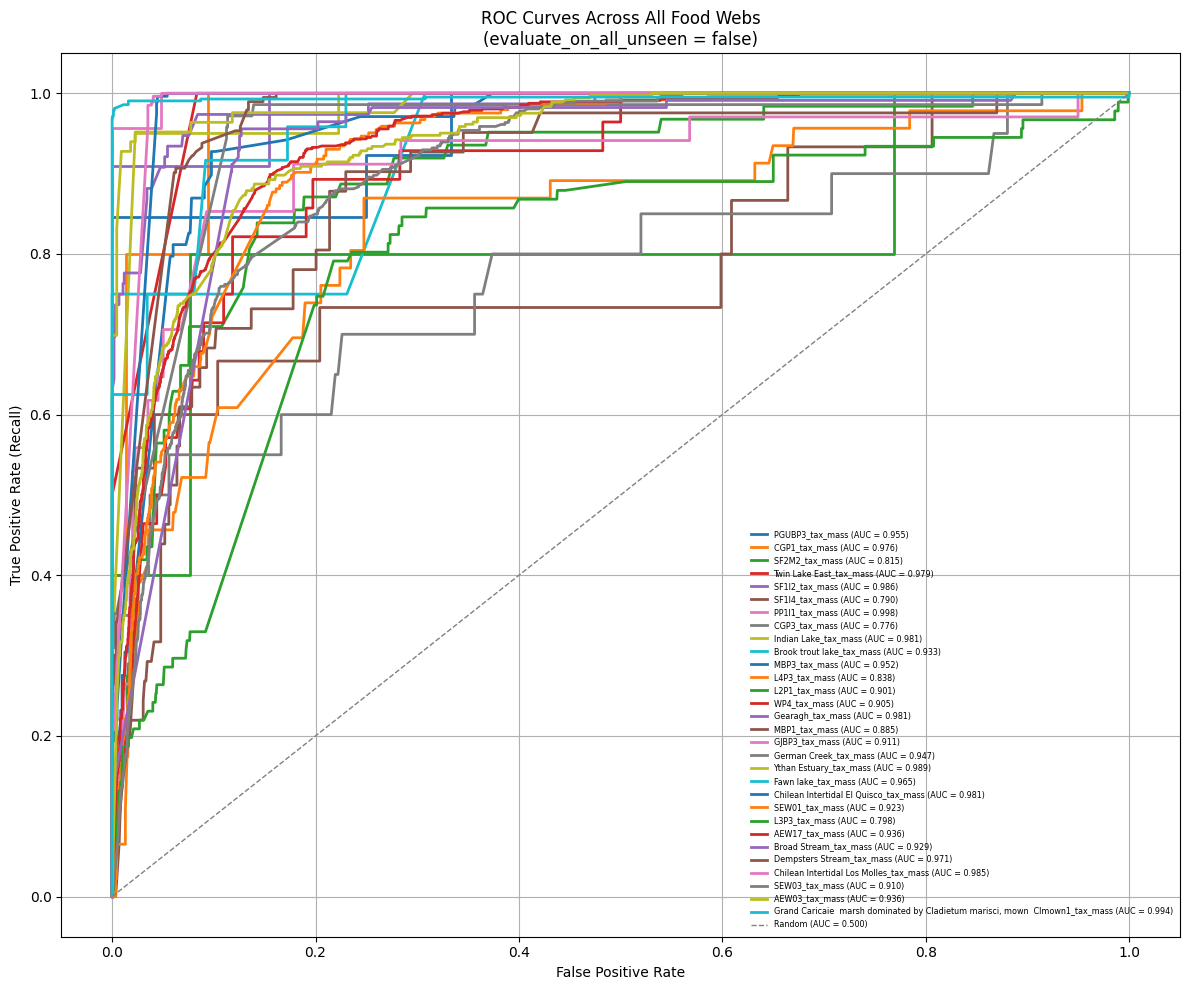

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os

# === Load list of food webs ===
foodwebs_df = pd.read_csv("../../src/matlab/data/foodwebs_mat/foodweb_metrics_small.csv")

# === Base path to your score-label CSVs ===
base_path = "../../src/matlab/data/result_evaluate_on_all_unseen-false/confusion_matrix_csv"

# === Start the combined plot ===
plt.figure(figsize=(12, 10))

# === Loop over each food web and plot its ROC curve ===
for foodweb in foodwebs_df["Foodweb"]:
    file_path = os.path.join(base_path, f"{foodweb}_K_10_scores_labels_evaluate_on_all_unseen-false.csv")

    try:
        df = pd.read_csv(file_path)
        y_true = df['Label']
        y_score = df['Score']

        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f"{foodweb} (AUC = {roc_auc:.3f})")

    except Exception as e:
        print(f"Skipping {foodweb} due to error: {e}")

# === Finalize the plot ===
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title("ROC Curves Across All Food Webs\n(evaluate_on_all_unseen = false)")
plt.legend(loc='lower right', fontsize='xx-small', frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()

---

#### 📈 ROC Curve Comparison: Before vs After Role-Constrained Negative Sampling

| Aspect                        | **Before (Random Negatives)**                               | **After (Trophic Role-Based)**                                               |
| ----------------------------- | ----------------------------------------------------------- | ---------------------------------------------------------------------------- |
| **True Positive Recovery**    | Strong for most food webs                                   | Still strong or improved                                                     |
| **AUC Distribution**          | High in general (most > 0.85)                               | Equal or slightly **higher AUCs** in most cases                              |
| **False Positive Rate (FPR)** | Slightly noisier for some sparse food webs                  | Reduced FPR in early recall zones for many networks                          |
| **Curve Clarity**             | Some irregularities                                         | Curves are cleaner, especially at low FPR                                    |
| **Ecological Validity**       | Penalizes model for predicting plausible links              | Avoids misleading negatives, focuses on **implausible** cases                |
| **Generalization Behavior**   | May inflate AUC with less biologically meaningful negatives | AUC reflects true generalization over implausible, non-observed interactions |

#### 🧠 Interpretation Summary

> After implementing **role-constrained negative sampling**, ROC curves retain or even improve their high classification performance. This suggests that the classifier’s ability to distinguish true interactions from **truly implausible ones** has increased. The **AUC values remain high**, but now represent a more ecologically meaningful measure of classifier quality, avoiding penalization from biologically valid but unobserved interactions.

---